In [377]:
import pandas as pd
df=pd.read_csv('train_agriculture.csv')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


Data Description:
    
    There are total 10 attributes and 88858 instances in Dataset. We need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.
    Please find below the attribute description-
    
    1. ID - Unique ID
    2. Estimated_Insects_Count - Estimated Insects count per square meter
    3. Crop_Type - Category of Crop(0,1)
    4. Soil_Type - Category of Soil(0,1)
    5. Pesticide_Use_Category - Type of Pesticides Uses (1:Never,2:Previously Used,3:Currently Using)
    6. Number_Doses_Week - Number of Doses Per Week
    7. Number_Weeks_Used - Number of Weeks Used
    8. Number_Weeks_Quit - Number of Weeks Quit
    9. Season - Season Category(1,2,3)
    10.Crop_Damage - Crop Damage Category(0:Alive,1:Damage due to other causes,2:Damage due to pesticides)

In [378]:
df.shape

(88858, 10)

In [379]:
df['ID']=df['ID'].drop_duplicates()

In [380]:
df.shape

(88858, 10)

In [381]:
duplicate_rows=df[df.duplicated()]
print(duplicate_rows.shape)

(0, 10)


In [382]:
df.drop(columns=['ID'],axis=1,inplace=True)

Above I have dropprd ID column from dataset because this has unique or discrete no which are not contributing to any output pattern

In [383]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [384]:
df.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

dataframe has 8 attributes with int datatype and only Number_Weeks_Used attribute with float datatype, but Number_Weeks_Used cannot be a float no, so here I will change it to the int datatype

In [385]:
df.isnull().values.any()

True

Dataframe has null values present inside

In [386]:
df.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

Number_Weeks_Used attribute of dataframe consists of total 9000 null values

Imputing Null Values with the help of fillna() function

In [387]:
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

In [388]:
df.isnull().values.any()

False

Changing datatype of Number_Weeks_Used from float to int

In [389]:
df['Number_Weeks_Used']=df['Number_Weeks_Used'].astype(int)

In [390]:
df.dtypes

Estimated_Insects_Count    int64
Crop_Type                  int64
Soil_Type                  int64
Pesticide_Use_Category     int64
Number_Doses_Week          int64
Number_Weeks_Used          int32
Number_Weeks_Quit          int64
Season                     int64
Crop_Damage                int64
dtype: object

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Estimated_Insects_Count  88858 non-null  int64
 1   Crop_Type                88858 non-null  int64
 2   Soil_Type                88858 non-null  int64
 3   Pesticide_Use_Category   88858 non-null  int64
 4   Number_Doses_Week        88858 non-null  int64
 5   Number_Weeks_Used        88858 non-null  int32
 6   Number_Weeks_Quit        88858 non-null  int64
 7   Season                   88858 non-null  int64
 8   Crop_Damage              88858 non-null  int64
dtypes: int32(1), int64(8)
memory usage: 5.8 MB


Observations:
    
    1. Now, there are total 88858 rows and 9 columns in dataframe.
    2. Now, all the attributes are of int datatype
    3. Now, there are no null values present in dataframe    

Summary Statistics

In [392]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.560771,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.749075,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


Observations:
    
    1. Min and Max number of pesticide Doses per week are 0 and 95 respectively
    2. Min and Max number of weeks used to do pesticide are 0 and 67 respectively
    3. Min and Max number of weeks pesticide was not used are 0 and 50 respectively
    4. In Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Used and Number_Weeks_Quit difference between Q3 and max is high so there might be some outliers are present in these columns

Data Correlation

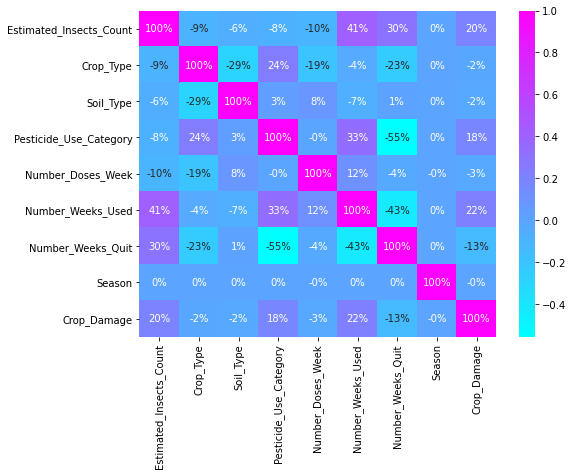

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
cor=df.corr()
sns.heatmap(cor,annot=True,fmt='.0%',cmap='cool')

Correlation with Target

Text(0.5, 1.0, 'correlation with target variable')

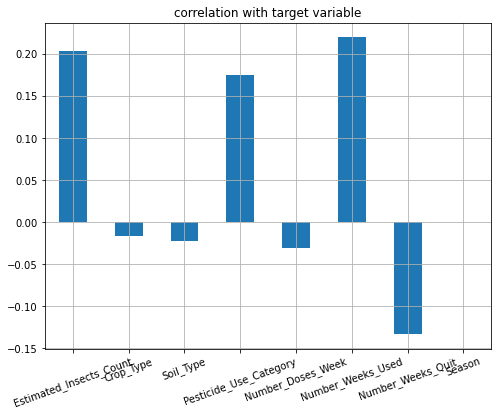

In [394]:
plt.figure(figsize=(8,6))
df.drop('Crop_Damage',axis=1).corrwith(df['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

Observations:
    
    1. Number of weeks used and Number of weeks quit attributes are most positively and most negatively correlated with Crop_Damage target attribute

    From the above fact we can analyse the significance or importance of overall week basis use of pesticides over crop output. Here more weeks the pesticide used resulted into more Live or 0 Damage of crops , on the other hand less no of weeks use of pesticide resulted into 1 Damage of crops

Univariate Analysis

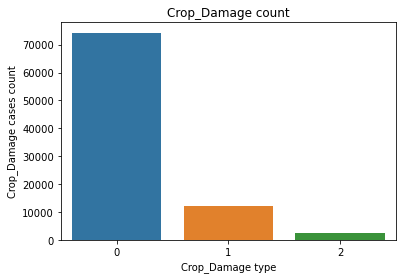

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64


In [395]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Crop_Damage',data=df)
plt.title('Crop_Damage count')
plt.xlabel('Crop_Damage type')
plt.ylabel('Crop_Damage cases count')
plt.show()

print(df['Crop_Damage'].value_counts())

From above plot we observe that there is output class imbalance present as Live crops class(0) and other two classes have very high difference among them

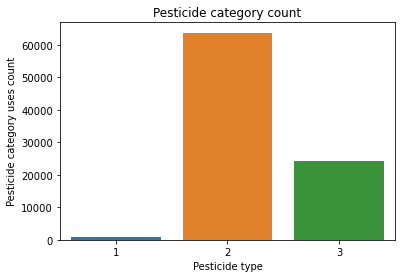

2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64


In [396]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Pesticide_Use_Category',data=df)
plt.title('Pesticide category count')
plt.xlabel('Pesticide type')
plt.ylabel('Pesticide category uses count')
plt.show()

print(df['Pesticide_Use_Category'].value_counts())

From above plot we can see that there are highest number of farmers who used pesticides before and lowest number of farmers who haven't used it in their life 

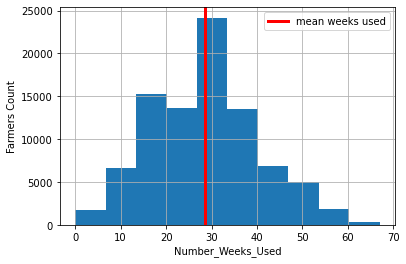

In [397]:
import numpy as np
Weeks_used=df['Number_Weeks_Used'].hist()
mean_val=np.mean(df['Number_Weeks_Used'])
plt.axvline(mean_val,linewidth=3,color='red',label='mean weeks used')
plt.xlabel('Number_Weeks_Used')
plt.ylabel('Farmers Count')
plt.legend()
plt.show()

From above plot we observe that the Mean no of weeks, the pesticide was used is around 28 weeks and that is used by around 24000 farmers

Bivariate Analysis

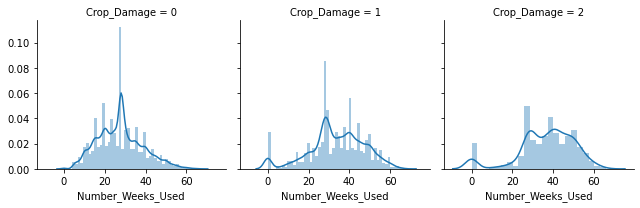

In [398]:
facet=sns.FacetGrid(df,col='Crop_Damage')
facet.map(sns.distplot,'Number_Weeks_Used')
plt.show()

Observation:
    
    1. From above first plot we observe that it is almost uniform since the pesticide was used uniformly over weeks hence it has 0 crop damage(all crops are live)
    2. From second plot we observe that in this case pesticide was less used in some starting weeks hence it has crop damage
    3. From third plot we observe that in this case there were the initial weeks when there was no use of pesticides hence it has crop damage

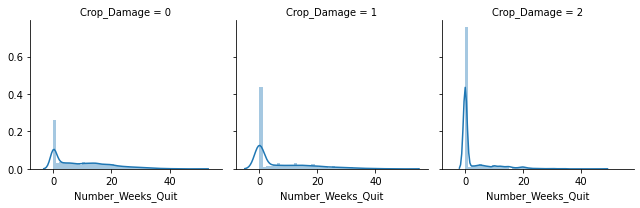

In [399]:
facet=sns.FacetGrid(df,col='Crop_Damage')
facet.map(sns.distplot,'Number_Weeks_Quit')
plt.show()

These plots are inverse of the above plots, here we observe that where there is more initial weeks the pesticides are quited, it resulted into high damage.

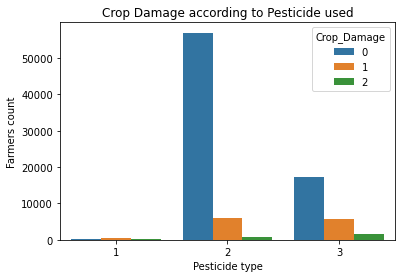

Pesticide_Use_Category  Crop_Damage
1                       1                554
                        2                165
                        0                118
2                       0              56958
                        1               6072
                        2                679
3                       0              17162
                        1               5681
                        2               1469
Name: Crop_Damage, dtype: int64


In [400]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Pesticide_Use_Category',hue='Crop_Damage',data=df)
plt.title('Crop Damage according to Pesticide used')
plt.xlabel('Pesticide type')
plt.ylabel('Farmers count')
plt.show()

print(df.groupby('Pesticide_Use_Category')['Crop_Damage'].value_counts())

From above plot we observe that the count of Live(0- Damage) crops is highest for pesticide type 2 i.e farmers who previously used pesticides and lowest for the farmers who never ever used pesticides i.e Pesticide type 1

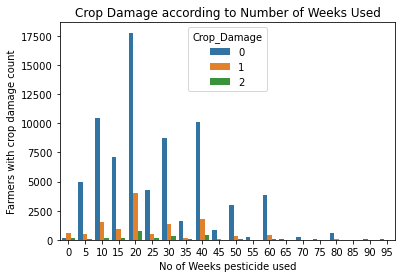

Number_Doses_Week  Crop_Damage
0                  1                554
                   2                165
                   0                118
5                  0               5007
                   1                473
                   2                 40
10                 0              10422
                   1               1542
                   2                147
15                 0               7108
                   1                950
                   2                120
20                 0              17789
                   1               4042
                   2                758
25                 0               4310
                   1                468
                   2                112
30                 0               8708
                   1               1399
                   2                331
35                 0               1647
                   1                155
                   2                 30
40       

In [401]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Number_Doses_Week',hue='Crop_Damage',data=df)
plt.title('Crop Damage according to Number of Weeks Used')
plt.xlabel('No of Weeks pesticide used')
plt.ylabel('Farmers with crop damage count')
plt.show()

print(df.groupby('Number_Doses_Week')['Crop_Damage'].value_counts())

Observations:

1. From above plots we observe that there are most no of live crops also the most no of damage crops while harvesting when pesticides are used for 20 weeks.

2. The best ratio we observe of live:lost is when the pesticides are used for 5 to 15 weeks

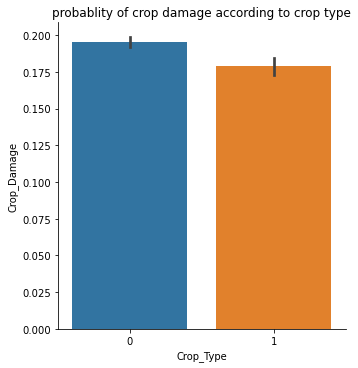

In [402]:
import warnings
warnings.filterwarnings('ignore')
sns.factorplot(x='Crop_Type',y='Crop_Damage',data=df,kind='bar')
plt.title('probablity of crop damage according to crop type')
plt.show()

From above probability plot we can see that the probability of crop 0 type to damage is higher than crop 1

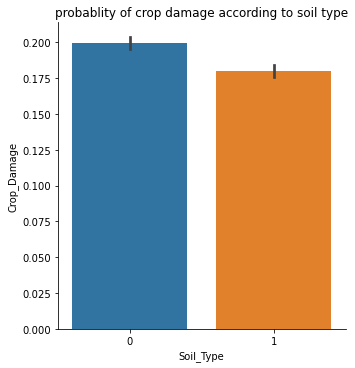

In [403]:
sns.factorplot(x='Soil_Type',y='Crop_Damage',data=df,kind='bar')
plt.title('probablity of crop damage according to soil type')
plt.show()

From above probability plot we can see that the probability of crop in soil type 0 to damage is higher than that in soil type 1

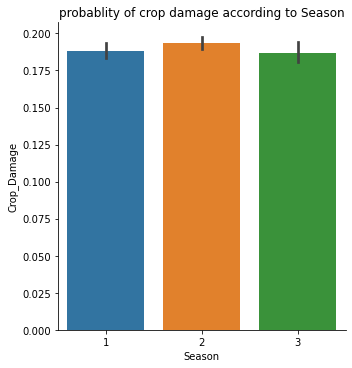

In [404]:
sns.factorplot(x='Season',y='Crop_Damage',data=df,kind='bar')
plt.title('probablity of crop damage according to Season')
plt.show()

From above probability plot we can see that the probability of crop damage is highest in Season 2

Plotting Distribution of Skewness

In [405]:
df.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.274030
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

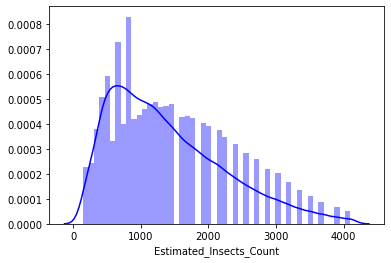

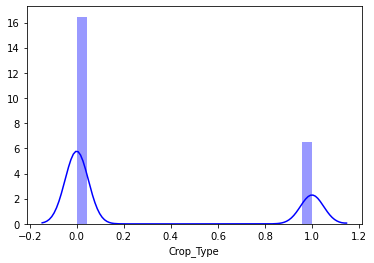

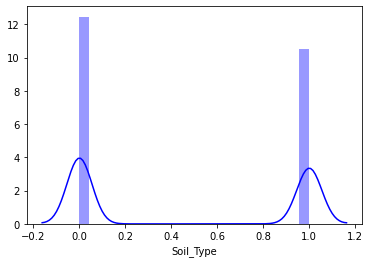

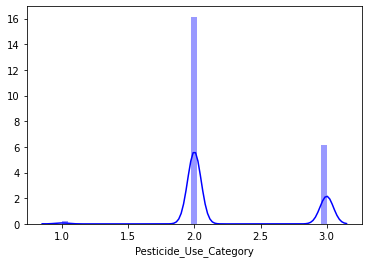

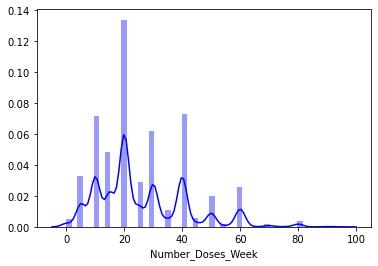

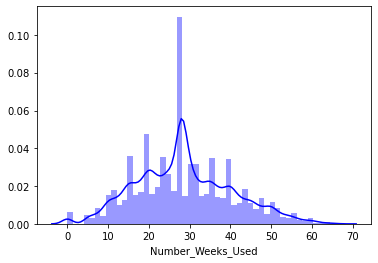

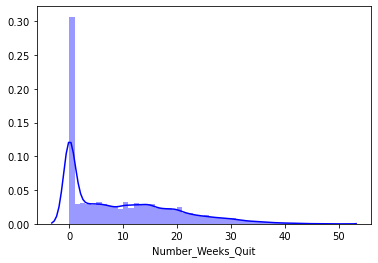

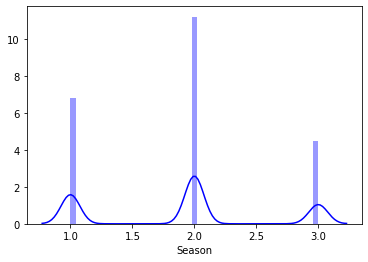

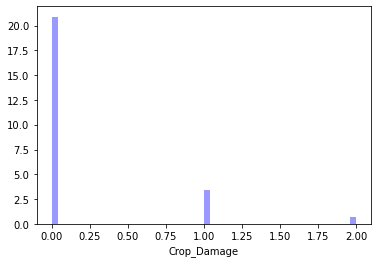

In [406]:
for col in df.describe().columns:
    sns.distplot(df[col],color='b')
    plt.show()

Observations:
    
    1. Estimated Insect counts is postively skewed(Right skewed)i.e - Mean>Median
    2. Number Weeks Used is nearby uniformly distributed
    3. Number of Weeks Quit is positively skewedi.e -Mean>Median
    4. Others are categorical attributes.    

Plotting Outliers using Boxplot

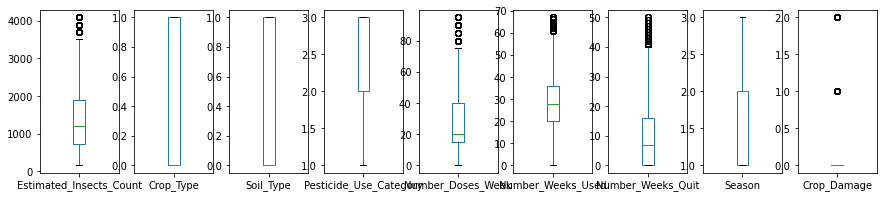

In [407]:
axs = df.plot(kind='box',subplots=True,figsize=(15,3))

From above boxplot subplots we observe that Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Used and Number_Weeks_Quit attributes are having high number of outliers inside.

Removing Outliers using Zscore

In [408]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [409]:
df_new.shape

(84853, 9)

In [410]:
df.shape

(88858, 9)

Output Class Balancing, Normalization and Standardization

In [411]:
df_new['Crop_Damage'].unique()

array([0, 1], dtype=int64)

In [412]:
df_new['Crop_Damage'].value_counts()

0    72903
1    11950
Name: Crop_Damage, dtype: int64

In [413]:
df_majority = df_new[df_new.Crop_Damage==0]
df_minority = df_new[df_new.Crop_Damage==1]

In [414]:
df_minority_upsampled = resample(df_minority,replace=True,n_samples=72903,random_state=123)

In [415]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [416]:
df_upsampled.Crop_Damage.value_counts()

1    72903
0    72903
Name: Crop_Damage, dtype: int64

In [417]:
x=df_upsampled.drop(columns=['Crop_Damage'],axis=1)

In [418]:
y=df_upsampled['Crop_Damage']

In [419]:
x.skew()

Estimated_Insects_Count    0.612439
Crop_Type                  1.013398
Soil_Type                  0.209641
Pesticide_Use_Category     0.224919
Number_Doses_Week          0.736585
Number_Weeks_Used          0.003102
Number_Weeks_Quit          0.940835
Season                     0.148078
dtype: float64

In [420]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x=pt.fit_transform(x)
x=pd.DataFrame(x)

In [421]:
x.skew()

0   -0.061341
1    1.013398
2    0.209641
3   -0.002390
4   -0.006584
5   -0.082083
6   -0.011843
7   -0.042064
dtype: float64

In [422]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

Importing All Libraries, Metrics and Models

In [423]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

Model Training

In [424]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [425]:
print(x_train.shape,'\t',x_test.shape)

(116644, 8) 	 (29162, 8)


In [426]:
print(y_train.shape,'\t',y_test.shape)

(116644,) 	 (29162,)


In [427]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
knc=KNeighborsClassifier()
model=[lr,dtc,gnb,knc]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print('confusion_matrix:',confusion_matrix(y_test,y_pred))
    print('classification_report:',classification_report(y_test,y_pred))
    print('\n')

Score of LogisticRegression() is: 0.6781831898768904
accuracy score: 0.6821891502640423
confusion_matrix: [[10092  4451]
 [ 4817  9802]]
classification_report:               precision    recall  f1-score   support

           0       0.68      0.69      0.69     14543
           1       0.69      0.67      0.68     14619

    accuracy                           0.68     29162
   macro avg       0.68      0.68      0.68     29162
weighted avg       0.68      0.68      0.68     29162



Score of DecisionTreeClassifier() is: 0.9911697129728061
accuracy score: 0.920924490775667
confusion_matrix: [[12348  2195]
 [  111 14508]]
classification_report:               precision    recall  f1-score   support

           0       0.99      0.85      0.91     14543
           1       0.87      0.99      0.93     14619

    accuracy                           0.92     29162
   macro avg       0.93      0.92      0.92     29162
weighted avg       0.93      0.92      0.92     29162



Score of GaussianNB

Out of above classifiers DecisionTreeClassifier is performing good.

Let's see using GridSearchCV hyperparameter tuning whether DecisionTreeClassifier is Overfitting or Not

In [428]:
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)

{'criterion': 'entropy'}


Passing best parameter to the classifier

In [429]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
print('Score of',dtc,'is:',dtc.score(x_train,y_train))
y_pred=dtc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,y_pred))
print('confusion matrix:',confusion_matrix(y_test,y_pred))
print('classification report:',classification_report(y_test,y_pred))

Score of DecisionTreeClassifier(criterion='entropy') is: 0.9911697129728061
accuracy score: 0.9211645291818119
confusion matrix: [[12346  2197]
 [  102 14517]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.85      0.91     14543
           1       0.87      0.99      0.93     14619

    accuracy                           0.92     29162
   macro avg       0.93      0.92      0.92     29162
weighted avg       0.93      0.92      0.92     29162



So the result is same, hence the model is not overfitting

Lets try one more time with Cross Validation of the scores for all the classifiers and see if there is overfitting/Underfitting.

In [430]:
model=[DecisionTreeClassifier(criterion='entropy'),KNeighborsClassifier(),LogisticRegression(),GaussianNB()]
for m in model:
    mscores=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print(mscores)
    print('mean score and standard deviation of',m,'is',mscores.mean(),mscores.std())
    print('\n')

[0.92150744 0.9176983  0.91955008 0.92112753 0.91989301]
mean score and standard deviation of DecisionTreeClassifier(criterion='entropy') is 0.9199552724018986 0.001345022093595327


[0.82758384 0.8236686  0.82781798 0.8303899  0.82497171]
mean score and standard deviation of KNeighborsClassifier() is 0.8268864059268063 0.0023515565463211865


[0.68407517 0.67813175 0.67593704 0.68118377 0.67518261]
mean score and standard deviation of LogisticRegression() is 0.6789020673147951 0.003322237125584497


[0.68993896 0.6828641  0.6828641  0.68221254 0.67823463]
mean score and standard deviation of GaussianNB() is 0.6832228665754833 0.003775357789493227




Again the DecisionTreeClassifier has best score and also least Standard deviation

Let's see using Ensembling techniques if we can still boost up the score

In [431]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [432]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print('confusion matrix:',confusion_matrix(y_test,y_pred))
    print('classification report:',classification_report(y_test,y_pred))
    print('*****************************************************************************************************************')
    print('\n')

Score of RandomForestClassifier() is: 0.9911697129728061
accuracy score: 0.946402853027913
confusion matrix: [[13064  1479]
 [   84 14535]]
classification report:               precision    recall  f1-score   support

           0       0.99      0.90      0.94     14543
           1       0.91      0.99      0.95     14619

    accuracy                           0.95     29162
   macro avg       0.95      0.95      0.95     29162
weighted avg       0.95      0.95      0.95     29162

*****************************************************************************************************************


Score of AdaBoostClassifier() is: 0.7115325263193992
accuracy score: 0.7127769014470887
confusion matrix: [[10529  4014]
 [ 4362 10257]]
classification report:               precision    recall  f1-score   support

           0       0.71      0.72      0.72     14543
           1       0.72      0.70      0.71     14619

    accuracy                           0.71     29162
   macro avg    

From above we observe that ExtraTreesClassifier is performing best and that too on both the output classes(Uniformly)

Let's check if ExtraTreesClassifier model is Overfitting/Underfitting by using Cross Validation of Scores

In [433]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    mscores=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print(mscores)
    print('mean score and standard deviation of',m,'is',mscores.mean(),mscores.std())
    print('\n')

[0.94424251 0.94314324 0.94297178 0.94667535 0.94568088]
mean score and standard deviation of RandomForestClassifier() is 0.9445427506429315 0.001439448498303562


[0.71493725 0.71218408 0.71084668 0.71369295 0.70933781]
mean score and standard deviation of AdaBoostClassifier() is 0.7121997535252762 0.00198722160688932


[0.72985392 0.72610679 0.72264326 0.72761565 0.72089435]
mean score and standard deviation of GradientBoostingClassifier() is 0.7254227917155139 0.00326018461575732


[0.93769289 0.93649052 0.93515312 0.93913103 0.937485  ]
mean score and standard deviation of BaggingClassifier() is 0.9371905099764206 0.0013225500975078911


[0.95771895 0.9572717  0.95720311 0.959535   0.96018655]
mean score and standard deviation of ExtraTreesClassifier() is 0.9583830614934377 0.0012367678622962005




So we observe from above scores that model is perfect and since it has very less Standard deviation

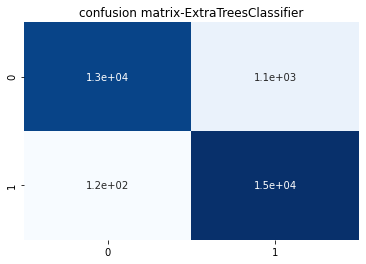

In [434]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
cm=confusion_matrix(y_test,predet)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.title('confusion matrix-ExtraTreesClassifier')
plt.show()

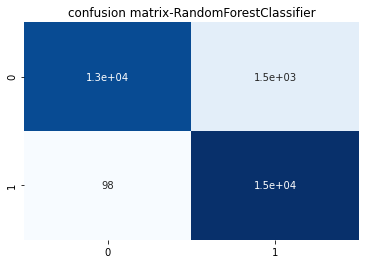

In [435]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
cm=confusion_matrix(y_test,predrf)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.title('confusion matrix-RandomForestClassifier')
plt.show()

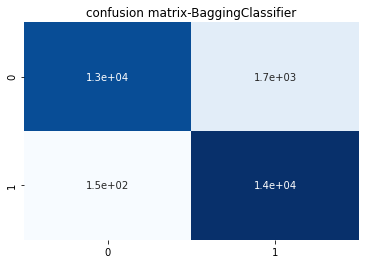

In [436]:
bg=BaggingClassifier()
bg.fit(x_train,y_train)
predbg=bg.predict(x_test)
cm=confusion_matrix(y_test,predbg)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.title('confusion matrix-BaggingClassifier')
plt.show()

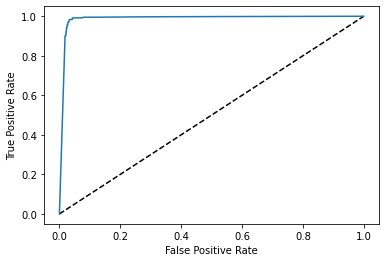

0.9579042512144769


In [437]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=et.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predet)
print(auc_score)

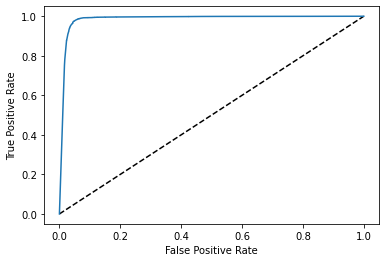

0.9442174748666792


In [438]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predrf)
print(auc_score)

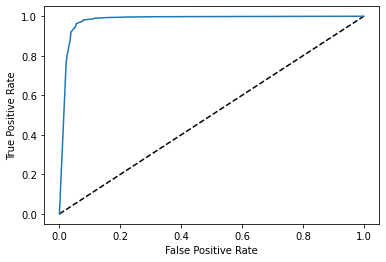

0.9375217978492862


In [441]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=bg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='BaggingClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predbg)
print(auc_score)

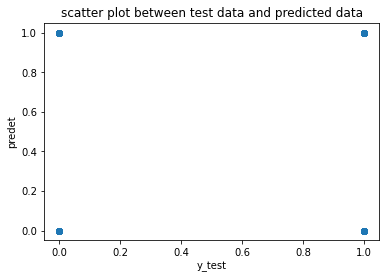

In [442]:
plt.scatter(y_test,predet)
plt.xlabel('y_test')
plt.ylabel('predet')
plt.title('scatter plot between test data and predicted data')
plt.show()

From above confusion matrices and AUC-ROC curves we have cross checked the performance and score of the ExtraTreesClassifier and it is the best model among others, so here I am going to save it for the future output prediction.

Saving ExtraTreesClassifier model

In [344]:
import joblib
file='agriet.pkl'
joblib.dump(et,file)

['agriet.pkl']

In [348]:
import pandas as pd
df_test=pd.read_csv('test_agriculture.csv')
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [349]:
df_test.drop(columns=['ID'],axis=1,inplace=True)

In [351]:
df_test.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [350]:
df_test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [352]:
df_test['Number_Weeks_Used'].fillna(df_test['Number_Weeks_Used'].mean(),inplace=True)

In [353]:
df_test['Number_Weeks_Used']=df_test['Number_Weeks_Used'].astype(int)

Analysing Correlation

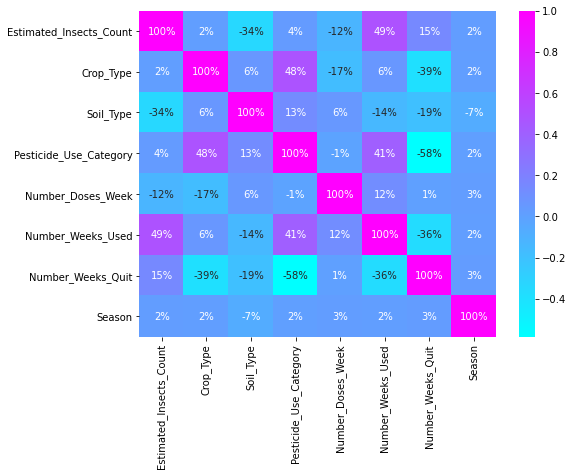

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
cor=df_test.corr()
sns.heatmap(cor,annot=True,fmt='.0%',cmap='cool')

Plotting Outliers

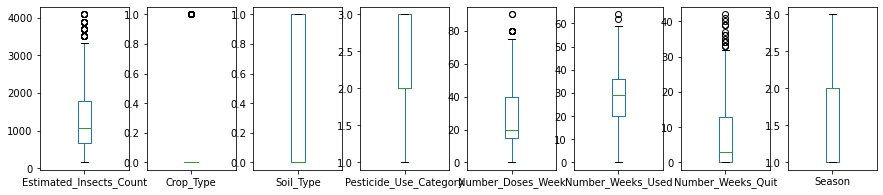

In [356]:
axs = df_test.plot(kind='box',subplots=True,figsize=(15,3))

Removing Outliers

In [357]:
from scipy.stats import zscore
z=np.abs(zscore(df_test))
df_test_new=df_test[(z<3).all(axis=1)]

In [358]:
df_test_new.shape

(1160, 8)

In [359]:
df_test.shape

(1199, 8)

Normalization and Standardization

In [360]:
df_test_new.skew()

Estimated_Insects_Count    1.013185
Crop_Type                  1.515496
Soil_Type                  0.148878
Pesticide_Use_Category     0.069452
Number_Doses_Week          0.645208
Number_Weeks_Used          0.224662
Number_Weeks_Quit          1.032108
Season                     0.159728
dtype: float64

In [361]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df_test_new=pt.fit_transform(df_test_new)
df_test_new=pd.DataFrame(df_test_new)

In [362]:
df_test_new.skew()

0   -0.019796
1    1.515496
2    0.148878
3   -0.023826
4   -0.034345
5   -0.014469
6    0.119436
7   -0.039436
dtype: float64

In [363]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_test_new=sc.fit_transform(df_test_new)
df_test_new=pd.DataFrame(df_test_new)

Loading previously saved best model for prediction

In [369]:
loadfile=joblib.load('agriet.pkl')

Passing the test file to predict results

In [371]:
predtest_et=loadfile.predict(df_test_new)

Output

In [374]:
predtest_et=pd.DataFrame(predtest_et)
predtest_et

,0
0,1
1,1
2,1
3,1
4,1
...,...
1155,0
1156,0
1157,0
1158,1
